In [1]:
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
def ra_dec2vec(ra, dec):
    sc = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    theta = sc.galactic.l.degree
    phi = sc.galactic.b.degree
    vec = hp.ang2vec(lonlat=True, theta = theta, phi = phi)
    return vec


In [17]:
def find_clusters(cat, ra, dec, patch_radius, cluster_radius, nside=2**17):
    sc = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    cat_sc = SkyCoord(ra=cat['RAdeg']*u.degree, dec=cat['DEdeg']*u.degree, frame='icrs')
    
    dists = sc.separation(cat_sc).degree
    clusters = cat.iloc[dists < patch_radius]
    print(clusters)
    
    pixels=[]
    for i in range(clusters.shape[0]):
        vec=ra_dec2vec(clusters['RAdeg'], clusters['DEdeg'])[0]
        pixels.extend(hp.query_disc(nside=nside, vec=vec, radius=np.radians(cluster_radius), nest=True))
    return pixels

In [4]:
planck = pd.read_csv('../src_data/planck_z.csv', index_col='index')

In [5]:
from all_p import ClusterFile

In [6]:
cf = ClusterFile('tf_il1_ip12_ra129.0758_dec65.6675_sgrizym_in5.npy')

In [8]:
from all_p import ra_dec2n_pix

In [9]:
pc_pix = ra_dec2n_pix(cf.params['ra'], cf.params['dec'], nside=2**17)

In [20]:
cf.params['ra'], cf.params['dec']

(129.0758, 65.6675)

In [11]:
import numpy as np

In [12]:
pic_pix = np.load('/home/rt2122/data/train/mtx/tmtx_il1_ip12_ra129.0758_dec65.6675_in5.npy')

In [13]:
from all_p import pix2dict

In [14]:
dict_pix = pix2dict(pic_pix)

In [15]:
del pic_pix

In [16]:
def draw_clusters(dict_pix, pix, size=4096):
    ans=np.zeros((size, size), dtype=np.uint8)
    for p in pix:
        if p in dict_pix:
            ans[dict_pix[p]] = 1
    return ans

In [21]:
mask = find_clusters(planck, cf.params['ra'], cf.params['dec'], 0.64, 0.08, nside=2**17)

                     Name       RAdeg     DEdeg       z       MSZ  \
index                                                               
490    PSZ2 G149.75+34.68  127.714749  65.86229  0.1818  8.859059   

               MCXC             RedMAPPer  pix     theta       phi  
index                                                               
490    J0830.9+6551                          5  2.613734  0.605399  


NameError: name 'hp' is not defined

In [25]:
draw = draw_clusters(dict_pix, mask, 4096)

In [16]:
from skimage.io import imshow

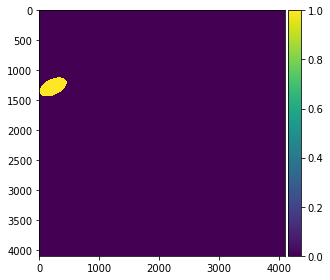

In [26]:
imshow(draw)

In [26]:
np.array(mask).shape

(45369269,)

In [27]:
draw.max()

0

In [28]:
set(dict_pix).intersection(set())

set()

In [29]:
min(dict_pix), max(dict_pix)

(7092384, 7118303)

In [38]:
min(mask), max(mask)

(7093117, 7135313)

In [30]:
mask = np.array(mask)

In [31]:
del planck

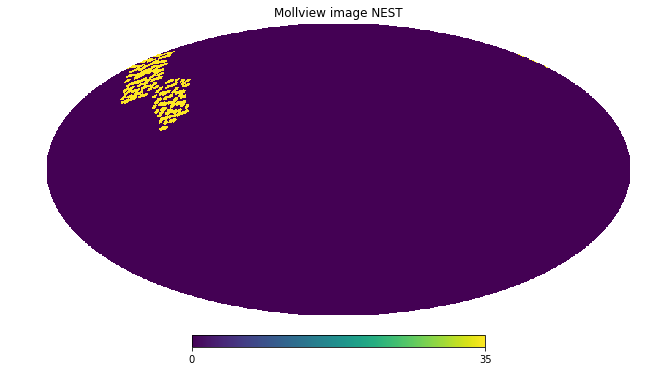

In [34]:
show_pix(mask)

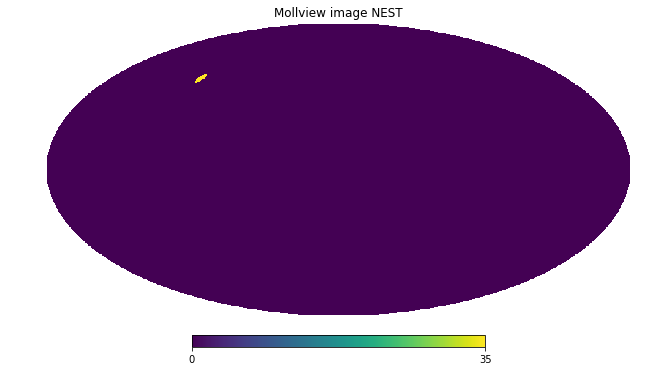

In [35]:
show_pix(dict_pix)

In [ ]:
vec = hp.pix2vec(nside=2**11, )
show_pix(hp.query_disc())